In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn import svm
import os
# load file
path = os.getcwd()+"/PCA_dataset/"
bac_train_fn = "PCA7_500_bacteria_train.txt"
bac_train = np.loadtxt(path+bac_train_fn)
bac_test_fn = "PCA7_234_bacteria_test.txt"
bac_test = np.loadtxt(path+bac_test_fn)

vir_train_fn = "PCA7_500_virus_train.txt"
vir_train = np.loadtxt(path+vir_train_fn)
vir_test_fn = "PCA7_148_virus_test.txt"
vir_test = np.loadtxt(path+vir_test_fn)

norm_trian_fn = "PCA7_500_NORMAL_train.txt"
norm_trian = np.loadtxt(path+norm_trian_fn)
norm_test_fn = "PCA7_234_NORMAL_test.txt"
norm_test = np.loadtxt(path+norm_test_fn)
n_pts = 50
raw_data_total = np.r_[bac_train[:n_pts,:],bac_test[:n_pts,:],vir_train[:n_pts,:],vir_test[:n_pts,:],norm_trian[:n_pts,:],norm_test[:n_pts,:]]

In [2]:
from sklearn import preprocessing
### extracting data, making sure that we have equal number of points from each class
print ("raw_data_total",np.shape(raw_data_total))
data_total=[]
class_total=[]
for i in range(len(raw_data_total)):
    if int(raw_data_total[i][-1])==0:
        class_total.append('A')
    elif int(raw_data_total[i][-1])==1:
        class_total.append('B')
    elif int(raw_data_total[i][-1])==2:
        class_total.append('C')
    data_total.append(raw_data_total[i][0:7])
    
    
scaler = preprocessing.MinMaxScaler().fit(data_total)
#data_normalize = scaler.transform(data[:,:-1])
data_total_norm = scaler.transform(data_total)
x_train, x_test, y_train, y_test= train_test_split(data_total_norm, class_total, test_size=0.2, random_state=1430, stratify=class_total)

Dict_train = {}
Dict_train.setdefault("A",[])
Dict_train.setdefault("B",[])
Dict_train.setdefault("C",[])

Dict_test = {}
Dict_test.setdefault("A",[])
Dict_test.setdefault("B",[])
Dict_test.setdefault("C",[])

for i in range(len(y_train)):
    Dict_train[y_train[i]].append(x_train[i])
for i in range(len(y_test)):
    Dict_test[y_test[i]].append(x_test[i])

temp = [Dict_test[k] for k in Dict_test]
total_array = np.concatenate(temp) 

x_test = [Dict_test[k] for k in Dict_test]
x_test = np.r_[x_test[0],x_test[1],x_test[2]]
print (np.shape(x_test))
#print (x_test)
y_test = []
for i in range(20):
    y_test.append(0)
for i in range(20):
    y_test.append(1)
for i in range(20):
    y_test.append(2)

x_train = [Dict_train[k] for k in Dict_train]
x_train = np.r_[x_train[0],x_train[1],x_train[2]]
print (np.shape(x_train))
y_train = []
for i in range(80):
    y_train.append(0)
for i in range(80):
    y_train.append(1)
for i in range(80):
    y_train.append(2)

#print (x_test)

raw_data_total (300, 8)
(60, 7)
(240, 7)


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

# rbf
C_range = np.logspace(-2, 10, 10)
gamma_range = np.logspace(-9, 3, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)
print (np.shape(x_train))
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

(240, 7)
The best parameters are {'C': 10000.0, 'gamma': 1.0} with a score of 0.75


Best C: 200.0
Best gamma: 1.0
Score on the test set 0.7666666666666667
(60,)
(60,)


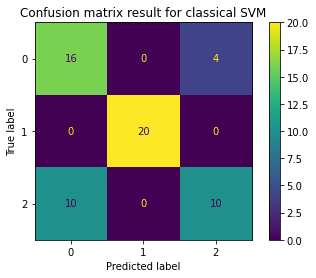

In [4]:
# Find the best hyperparameters for SVM
best_C = grid.best_params_["C"]
print ("Best C:",best_C)
best_gamma = grid.best_params_["gamma"]
print ("Best gamma:",best_gamma)
clf = svm.SVC(kernel ="rbf", C= best_C, gamma = best_gamma)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score_test = accuracy_score(y_test, y_pred)
print(f'Score on the test set {score_test}')

print (np.shape(y_test))
print (np.shape(y_pred))
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion matrix result for classical SVM")
plt.savefig("confusion_mat_classical_svm_v3.pdf")
